#Librerias

In [55]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Santiago Zubieta\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
from pgmpy.models import BayesianNetwork;from pgmpy.factors.discrete import TabularCPD;import dash;from dash import dcc ;from dash import html;from dash.dependencies import Input, Output;import plotly.express as px;from pgmpy . inference import VariableElimination
from pgmpy . sampling import BayesianModelSampling;from pgmpy . estimators import MaximumLikelihoodEstimator;
from pgmpy . estimators import BayesianEstimator;import pandas as pd;from pgmpy . inference import VariableElimination
import numpy as np
from pgmpy.factors.discrete import DiscreteFactor
from sklearn.model_selection import train_test_split
from pgmpy.readwrite import BIFReader; from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
from pgmpy.estimators import BicScore

c:\Users\Santiago Zubieta\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#Traer datos de train y test
X_train=pd.read_csv('X_train')
X_train=X_train.iloc[:, 2:]

X_test=pd.read_csv('X_test')
X_test=X_test.iloc[:, 1:]

Y_test=pd.read_csv('Y_test')
Y_test=Y_test.iloc[:, 1:]

Y_train=pd.read_csv('Y_train')
Y_train=Y_train.iloc[:, 2:]

datos_totales=pd.read_csv('datostotales')
datos_totales=datos_totales.iloc[:,1:]
print(datos_totales.head())


           age  sex   cp       trestbps  chol  fbs  restecg thalach  exang  \
0  AdultoMayor  1.0  1.0   Hipertension  Alto  1.0      2.0    Alta    0.0   
1  AdultoMayor  1.0  4.0   Hipertension  Alto  0.0      2.0    Bajo    1.0   
2  AdultoMayor  1.0  4.0  TensionNormal  Alto  0.0      2.0  Normal    1.0   
3  AdultoJoven  1.0  3.0  TensionNormal  Alto  0.0      0.0    Alta    0.0   
4       Adulto  0.0  2.0  TensionNormal  Alto  0.0      2.0    Alta    0.0   

  oldpeak  slope   ca  thal  hd  
0    Alto    3.0  0.0   6.0   0  
1    Alto    2.0  3.0   3.0   1  
2    Alto    2.0  2.0   7.0   1  
3    Alto    3.0  0.0   3.0   0  
4    Alto    1.0  0.0   3.0   0  


In [6]:
#Arreglo el df
suplante=X_test.astype(str)
suplante=X_test.applymap(str)
print(suplante.head())
X_test=suplante
#Leo el modelo
reader = BIFReader("modeloPablito.bif")
modelo = reader.get_model()
def printCPds():
    for i in modelo.nodes():
        print(modelo.get_cpds(i))

           age  sex   cp       trestbps    chol  fbs restecg thalach exang  \
0       Adulto  0.0  2.0  TensionNormal  Normal  0.0     0.0  Normal   0.0   
1       Adulto  1.0  4.0  TensionNormal    Alto  0.0     0.0    Alta   0.0   
2       Adulto  0.0  3.0  TensionNormal    Alto  1.0     0.0    Alta   0.0   
3  AdultoMayor  1.0  4.0  TensionNormal    Alto  0.0     2.0    Bajo   0.0   
4       Adulto  1.0  2.0  TensionNormal    Alto  0.0     0.0    Alta   0.0   

  oldpeak slope   ca thal  
0  Normal   2.0  0.0  3.0  
1  Normal   1.0  1.0  3.0  
2  Normal   1.0  0.0  3.0  
3    Alto   2.0  3.0  3.0  
4  Normal   1.0  0.0  3.0  


In [7]:


probs=modelo.predict_probability(X_test)
#print(probs)
#print(probs['hd_0'][0])



In [8]:
#Estadisticas iniciales

threshold=0.8
probs['resML']=(probs['hd_1']>threshold).astype(int)

cm=confusion_matrix(Y_test['hd'],probs['resML'])
print(cm)

#Hacer demas estadisticas

[[41  1]
 [10 23]]


In [9]:

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test['hd'], probs['hd_1'])

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Find the threshold that maximizes the Youden's J statistic
youden_j = tpr - fpr
best_threshold = thresholds[np.argmax(youden_j)]

# Print the results
print('AUC:', roc_auc)
print('Best Threshold:', best_threshold)


probs['resMLBT']=(probs['hd_1']>best_threshold).astype(int)

cm=confusion_matrix(Y_test['hd'],probs['resMLBT'])
print(cm)

#Salio un threshhold de 0.18657636245651651


0.9653679653679654
AUC: 0.9653679653679654
Best Threshold: 0.18657636245651651
[[38  4]
 [ 4 29]]


In [10]:
#Ahora si estadisticas

#Matriz de confusion
probs['resML']=(probs['hd_1']>best_threshold).astype(int)
cm=confusion_matrix(Y_test['hd'],probs['resML'])
print("Matriz de confusion:")
print(cm)


Matriz de confusion:
[[38  4]
 [ 4 29]]


In [11]:
#De falsos positivos y negativos y falsos en general
vp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
vn=cm[1][1]

sensibilidad=(vp)/(vp+fn)
precision=vp/(vp+fp)
exactitud=(vp+vn)/(vp+fp+fn+vn)
especificidad=vn/(vn+fp)

print('Sensibilidad: ',sensibilidad)
print('Precision: ',precision)
print('Exactitud: ',exactitud)
print('Especificidad: ',especificidad)

Sensibilidad:  0.9047619047619048
Precision:  0.9047619047619048
Exactitud:  0.8933333333333333
Especificidad:  0.8787878787878788


In [12]:
#BIC Y k2
scoring_method=K2Score(data=datos_totales)
print("Puntaje K2: ",scoring_method.score(modelo))

scoring_method=BicScore(data=datos_totales)
print("Puntaje BIC: ", scoring_method.score(modelo))



Puntaje K2:  -3032.0392383406024
Puntaje BIC:  -3212.858649125302


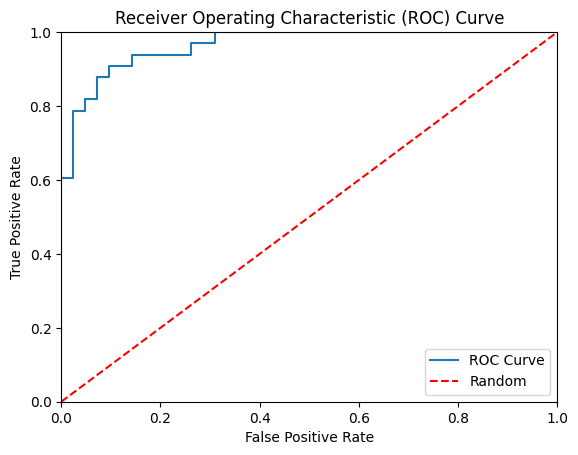

In [8]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()